# Single Character Network

The purpose of this network is to identify which alphanumeric value a CAPTCHA character and takes a centered 32x32 input.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import image_preprocess as img_pp

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

In [2]:
y_pos = np.load('data/y_single_pos.npy')
y_label = np.load('data/y_single_label.npy')
x = np.load('data/x_single.npy')
centered_labels = y_label[np.nonzero(y_pos)]
centered_x = x[np.nonzero(y_pos)]

np.save("data/x_single_centered.npy", centered_x)
np.save("data/y_single_label_centered.npy", centered_labels)

In [3]:
x, y = img_pp.preprocess_image_data('data/x_single_centered.npy', 'data/y_single_label_centered.npy')
print(f"x shape: {x.shape}")
print(f'y shape: {y.shape}')

x shape: (11700, 32, 32, 1)
y shape: (11700,)


In [4]:
x_train, x_val, x_test, x_train_dev, x_val_dev, y_train, y_val, y_test, y_train_dev, y_val_dev = img_pp.split('data/x_single_centered_preprocessed.npy', 'data/y_single_label_centered_preprocessed.npy', split_ratio = 0.6,  test_split = 1000)



In [33]:
# single character recognition
single = models.Sequential()
#CNN layer
single.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,1)))
single.add(layers.MaxPooling2D((2, 2)))
single.add(layers.Conv2D(64, (3, 3), activation='relu'))
single.add(layers.MaxPooling2D((2, 2)))
single.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Dense Layer
single.add(layers.Flatten())
single.add(layers.Dense(64, activation='relu'))
single.add(layers.Dense(62)) 
# change to total alphanumeric  unique values
# change cross entropy to 

single.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 1024)             

In [34]:
print(x_train_dev.shape, y_train_dev.shape)
print(x_val_dev.shape, y_val_dev.shape)
print(np.unique(y_label))

ind2char = {}
char2ind = {}
for i, char in enumerate(np.unique(y_label)):
    ind2char[i] = char
    char2ind[char] = i
  
#print(char2ind['B'])
#print(ind2char[11])

y_train_dev_ind = np.vectorize(char2ind.get)(y_train_dev)
print(y_train_dev[0:5])
print(y_train_dev_ind[0:5])
y_val_dev_ind = np.vectorize(char2ind.get)(y_val_dev)


(3000, 32, 32, 1) (3000,)
(500, 32, 32, 1) (500,)
['3' '4' '5' '7' 'A' 'E' 'F' 'H' 'J' 'K' 'L' 'M' 'N' 'Q' 'R' 'S' 'T' 'X'
 'Y' 'a' 'd' 'f' 'h' 'i' 'j' 'k' 'p' 'r' 's' 't' 'w' 'x' 'y' 'z']
['K' 'r' 'J' 'T' 'S']
[ 9 27  8 16 15]


In [35]:
#Training Network
single.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


single_history = single.fit(x_train_dev, y_train_dev_ind, epochs=70, 
                    validation_data=(x_val_dev, y_val_dev_ind))


Epoch 1/70
94/94 [==============================] - 1s 9ms/step - loss: 3.7229 - accuracy: 0.0320 - val_loss: 3.5475 - val_accuracy: 0.0260
Epoch 2/70
94/94 [==============================] - 1s 8ms/step - loss: 3.5542 - accuracy: 0.0313 - val_loss: 3.5327 - val_accuracy: 0.0500
Epoch 3/70
94/94 [==============================] - 1s 8ms/step - loss: 3.4421 - accuracy: 0.0613 - val_loss: 3.2384 - val_accuracy: 0.1020
Epoch 4/70
94/94 [==============================] - 1s 8ms/step - loss: 2.9142 - accuracy: 0.1917 - val_loss: 2.6153 - val_accuracy: 0.2780
Epoch 5/70
94/94 [==============================] - 1s 8ms/step - loss: 2.2510 - accuracy: 0.3640 - val_loss: 2.1221 - val_accuracy: 0.3960
Epoch 6/70
94/94 [==============================] - 1s 8ms/step - loss: 1.8126 - accuracy: 0.4753 - val_loss: 1.7756 - val_accuracy: 0.4900
Epoch 7/70
94/94 [==============================] - 1s 8ms/step - loss: 1.5446 - accuracy: 0.5553 - val_loss: 1.6652 - val_accuracy: 0.5020
Epoch 8/70
94/94 [==

94/94 [==============================] - 1s 8ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.1525 - val_accuracy: 0.7120
Epoch 60/70
94/94 [==============================] - 1s 8ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.1717 - val_accuracy: 0.7200
Epoch 61/70
94/94 [==============================] - 1s 8ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.1795 - val_accuracy: 0.7080
Epoch 62/70
94/94 [==============================] - 1s 8ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.1927 - val_accuracy: 0.7100
Epoch 63/70
94/94 [==============================] - 1s 8ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.2272 - val_accuracy: 0.7120
Epoch 64/70
94/94 [==============================] - 1s 8ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 2.2262 - val_accuracy: 0.7100
Epoch 65/70
94/94 [==============================] - 1s 8ms/step - loss: 9.6666e-04 - accuracy: 1.0000 - val_loss: 2.2460 - val_accuracy: 0.7080
Epoch 66/70
94/94 [==

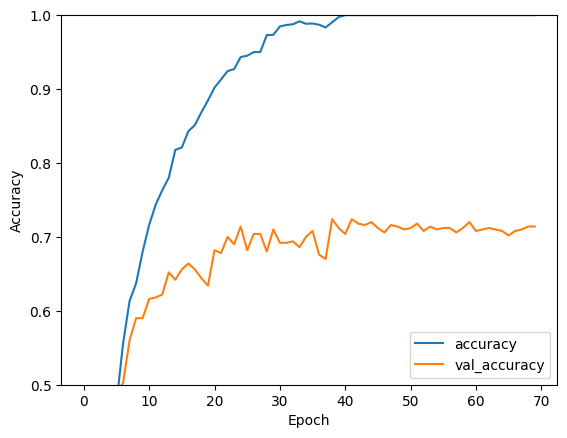

In [36]:
#Plotting Training Data
plt.plot(single_history.history['accuracy'], label='accuracy')
plt.plot(single_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [66]:
from keras_tuner import Hyperband
from tensorflow import keras


single.summary()
def model_builder(hp):
    # single character recognition
    single = keras.Sequential()
    #CNN layer
    single.add(layers.Conv2D(filters=hp.Int('conv_1_filter', min_value=32, max_value=64, step=4),
                             kernel_size=hp.Choice('conv_1_kernel', values = [3,5]), 
                             activation='relu', input_shape=(32,32,1)))
    single.add(layers.MaxPooling2D((2, 2)))
    
    single.add(layers.Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=4), 
                            kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
                            activation='relu'))
    single.add(layers.MaxPooling2D((2, 2)))
    
    single.add(layers.Conv2D(64, (3, 3), activation='relu'))

    #Dense Layer
    single.add(layers.Flatten())
    single.add(layers.Dense(units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16), 
                            activation='relu'))
    single.add(layers.Dense(units = 62)) 

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    single.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    return single

#creating randomsearch object
tuners = Hyperband(model_builder,
                    objective='val_accuracy',
                    max_epochs = 50,
                    factor = 10,
                    project_name = 'singleCharTrials')


stopEarly = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuners.search(x_train_dev, y_train_dev_ind, epochs=50, validation_split=0.2, callbacks=[stopEarly])

# Get the optimal hyperparameters
best_hp=tuners.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of filters in the first convolution
layer is {best_hp.get('conv_1_filter')}. The optimal kernel size in the first convolutional layer is
{best_hp.get('conv_1_kernel')}. Optimal filters in the second convolutional layer is {best_hp.get("conv_2_filter")}
and kernel size is {best_hp.get("conv_2_kernel")}.

Dense layers {best_hp.get('dense_1_units')}

and the optimal learning rate for the optimizer
is {best_hp.get('learning_rate')}.
""")


Trial 20 Complete [00h 02m 56s]
val_accuracy: 0.6383333206176758

Best val_accuracy So Far: 0.6583333611488342
Total elapsed time: 00h 05m 19s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of filters in the first convolution
layer is 64. The optimal kernel size in the first convolutional layer is
3. Optimal filters in the second convolutional layer is 60
and kernel size is 5.

Dense layers 128

and the optimal learning rate for the optimizer
is 0.001.



In [60]:
# single character recognition
single = models.Sequential()
#CNN layer
single.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,1)))
single.add(layers.MaxPooling2D((2, 2)))
single.add(layers.Conv2D(60, (5, 5), activation='relu'))
single.add(layers.MaxPooling2D((2, 2)))
single.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Dense Layer
single.add(layers.Flatten())
single.add(layers.Dense(128, activation='relu'))
single.add(layers.Dense(64)) 
# change to total alphanumeric  unique values
# change cross entropy to 

single.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        102464    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [62]:
single.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


single_history = single.fit(x_train_dev, y_train_dev_ind, epochs=50, 
                    validation_data=(x_val_dev, y_val_dev_ind))

Epoch 1/50
94/94 [==============================] - 2s 18ms/step - loss: 0.0514 - accuracy: 0.9870 - val_loss: 1.7293 - val_accuracy: 0.7340
Epoch 2/50
94/94 [==============================] - 2s 18ms/step - loss: 0.0304 - accuracy: 0.9927 - val_loss: 1.7724 - val_accuracy: 0.7280
Epoch 3/50
94/94 [==============================] - 2s 18ms/step - loss: 0.0311 - accuracy: 0.9917 - val_loss: 1.6675 - val_accuracy: 0.7480
Epoch 4/50
94/94 [==============================] - 2s 18ms/step - loss: 0.0963 - accuracy: 0.9670 - val_loss: 1.7538 - val_accuracy: 0.6980
Epoch 5/50
94/94 [==============================] - 2s 18ms/step - loss: 0.0702 - accuracy: 0.9760 - val_loss: 1.6883 - val_accuracy: 0.7260
Epoch 6/50
94/94 [==============================] - 2s 18ms/step - loss: 0.0536 - accuracy: 0.9863 - val_loss: 1.7682 - val_accuracy: 0.7240
Epoch 7/50
94/94 [==============================] - 2s 18ms/step - loss: 0.0098 - accuracy: 0.9987 - val_loss: 1.8376 - val_accuracy: 0.7320
Epoch 8/50
94

KeyboardInterrupt: 

In [ ]:
#Plotting Training Data
plt.plot(single_history.history['accuracy'], label='accuracy')
plt.plot(single_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
